In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [19]:
class QuadState(TypedDict):

    a:int
    b:int
    c:int

    equation: str
    result: str
    discriminant: float 

In [26]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x² + {state['b']}x + {state['c']}"
    return {"equation": equation}


In [49]:
def calculate_discriminant(state:QuadState):
    discriminant= (state['b']**2)- (4* state['a']* state['c'])
    return { "discriminant": discriminant}

In [76]:
def real_root(state:QuadState):
    root1= (- state['b'] + state['discriminant']**0.5)/ (2* state['a'])
    root2= (- state['b'] - state['discriminant']**0.5)/ (2* state['a'])
    result= f' the roots are {root1} and {root2}'

    return {'result' : result}

def repeated_roots(state:QuadState):
    root1= (- state['b'] )/ (2* state['a'])
    
    result= f' the reated roots is {root1}'

    return {'result' : result}

def no_realroots(state:QuadState):

    result= ' no real  roots '

    return {'result' : result}

def check_condition(state:QuadState) -> Literal["real_root", "no_realroots","repeated_roots"]:
    if state['discriminant'] >0:
        return 'real_root'
    elif state['discriminant'] ==0:
        return 'repeated_roots'
    
    else :
        return 'no_realroots'

    

In [77]:
graph = StateGraph(QuadState)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("no_realroots",no_realroots)
graph.add_node("real_root",real_root)
graph.add_node("repeated_roots",repeated_roots)


graph.add_edge(START, "show_equation")
graph.add_edge("show_equation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_condition)


graph.add_edge("no_realroots", END)

graph.add_edge("real_root", END)
graph.add_edge("repeated_roots", END)

workflow= graph.compile()

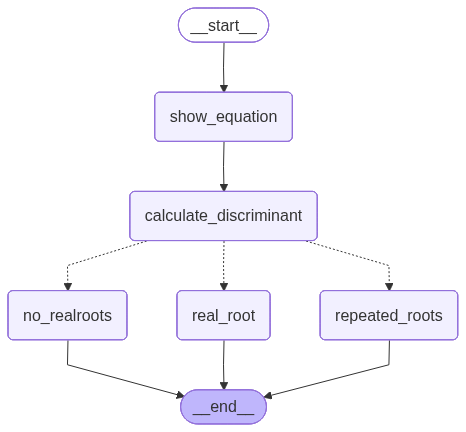

In [73]:
workflow

In [81]:
initial_state= {
    'a':4,
    'b': 2,
    'c': 4

}

workflow.invoke(initial_state)


{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4x² + 2x + 4',
 'result': ' no real  roots ',
 'discriminant': -60}